# Réalisation de la méthode des kmeans

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [193]:
from utils import *


df = pd.read_csv('../../data/data_preprocessed.csv').drop(['Potability', 'Unnamed: 0'], axis=1)

# Define x & y dataset
y = np.array(pd.DataFrame(df["Potability_det"]))
x = df.drop(["Potability_det"], axis=1)
df["Potability"] = df["Potability_det"]
mean = x.mean(axis=0)
x = x-mean

scaler = StandardScaler()
x_normalized = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


model = KMeans(n_clusters=2)  # Could be change (1, 2, ..., 9)


model.fit(x_normalized)

labels = model.labels_

success_rate = (labels == y).mean()
print("Taux de succes :", success_rate)

Taux de succes : 0.5111527546721102


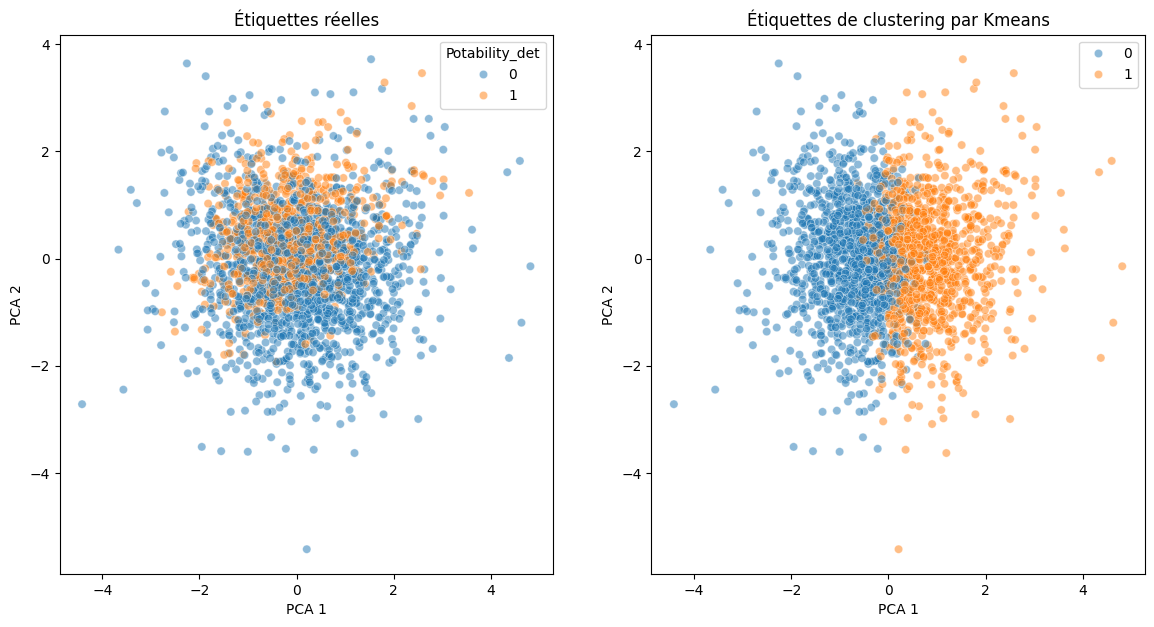

In [194]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

cls = PCA(n_components=9)
pcs = cls.fit_transform(x_normalized)


# Visualiser les résultats
plt.figure(figsize=(14, 7))

# Visualiser les étiquettes réelles
plt.subplot(1, 2, 1)
scatter = sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1], hue= df["Potability_det"], data=x_normalized, alpha=0.5)
plt.title("Étiquettes réelles")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Visualiser les étiquettes de clustering alignées
plt.subplot(1, 2, 2)
scatter = sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1], hue=labels, data=x_normalized, alpha=0.5)
plt.title("Étiquettes de clustering par Kmeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.show()